In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

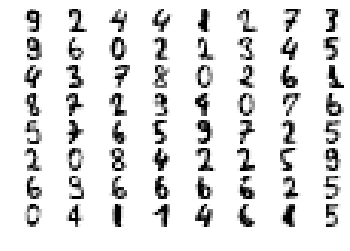

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 375)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
#class1 = [0, 2, 4, 6, 8]
#winner1 = get_winner(class1)

In [7]:
winner_list = []
classes = [[8, 9],[4,5,6,7],[2,3,6,7],[1,3,5,7,9]]

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:319
number of class2:1298

 ****** Running generation 0 ****** 

Population's average fitness: 0.57964 stdev: 0.20252
Best fitness: 0.82066 - size: (2, 13) - species 1 - id 45
Average adjusted fitness: 0.360
Mean genetic distance 2.901, standard deviation 0.477
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.987 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67362 stdev: 0.17763
Best fitness: 0.82066 - size: (2, 13) - species 1 - id 45
Average adjusted fitness: 0.449
Mean genetic distance 3.044, standard deviation 0.496
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.395 sec (5.191 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67861 stdev: 0.18254
Best fitness: 0.82622 - size: (4, 15) - species 1 - id 523
Average adjusted fitness: 0.458
Mean genetic distance 3.065, standard deviation 0.484
Population of 203 members in 31 species
Total extinction

Population's average fitness: 0.75576 stdev: 0.12866
Best fitness: 0.83673 - size: (5, 17) - species 33 - id 1089
Average adjusted fitness: 0.568
Mean genetic distance 3.210, standard deviation 0.535
Population of 195 members in 23 species
Total extinctions: 0
Generation time: 6.383 sec (6.337 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.75323 stdev: 0.11787
Best fitness: 0.83673 - size: (5, 17) - species 33 - id 1089
Average adjusted fitness: 0.553
Mean genetic distance 3.198, standard deviation 0.539
Population of 197 members in 22 species
Total extinctions: 0
Generation time: 6.514 sec (6.378 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.75729 stdev: 0.11426
Best fitness: 0.83673 - size: (5, 17) - species 33 - id 1089
Average adjusted fitness: 0.560
Mean genetic distance 3.216, standard deviation 0.549
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.694 sec (6.438 average)

 ******

Population of 195 members in 18 species
Total extinctions: 0
Generation time: 7.893 sec (7.357 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.73754 stdev: 0.13827
Best fitness: 0.86642 - size: (6, 20) - species 33 - id 6200
Average adjusted fitness: 0.539
Mean genetic distance 3.282, standard deviation 0.561
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.690 sec (7.431 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.73810 stdev: 0.14353
Best fitness: 0.86642 - size: (6, 20) - species 33 - id 6200
Average adjusted fitness: 0.540
Mean genetic distance 3.285, standard deviation 0.552
Population of 193 members in 19 species
Total extinctions: 0
Generation time: 7.917 sec (7.519 average)

 ****** Running generation 51 ****** 

Population's average fitness: 0.74477 stdev: 0.12373
Best fitness: 0.86642 - size: (6, 20) - species 33 - id 6200
Average adjusted fitness: 0.543
Mean genetic distance 

Total extinctions: 0
Generation time: 8.632 sec (8.709 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.73502 stdev: 0.14679
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.535
Mean genetic distance 3.343, standard deviation 0.670
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 8.930 sec (8.748 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.72733 stdev: 0.14576
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.527
Mean genetic distance 3.332, standard deviation 0.660
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 8.761 sec (8.767 average)

 ****** Running generation 75 ****** 

Population's average fitness: 0.73434 stdev: 0.14291
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.514
Mean genetic distance 3.300, standard deviation 0.659
Popul

Population's average fitness: 0.73638 stdev: 0.14956
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.535
Mean genetic distance 3.131, standard deviation 0.595
Population of 204 members in 16 species
Total extinctions: 0
Generation time: 11.232 sec (10.375 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.74236 stdev: 0.14354
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.543
Mean genetic distance 3.122, standard deviation 0.585
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 10.824 sec (10.507 average)

 ****** Running generation 99 ****** 

Population's average fitness: 0.74505 stdev: 0.14141
Best fitness: 0.86704 - size: (7, 22) - species 33 - id 10896
Average adjusted fitness: 0.545
Mean genetic distance 3.133, standard deviation 0.566
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 11.724 sec (10.664 average)

Population's average fitness: 0.74402 stdev: 0.13292
Best fitness: 0.86766 - size: (8, 23) - species 33 - id 17093
Average adjusted fitness: 0.535
Mean genetic distance 2.969, standard deviation 0.583
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 11.087 sec (10.503 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.72958 stdev: 0.15280
Best fitness: 0.86766 - size: (8, 23) - species 33 - id 17093
Average adjusted fitness: 0.528
Mean genetic distance 2.942, standard deviation 0.566
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 10.902 sec (10.594 average)

 ****** Running generation 123 ****** 

Population's average fitness: 0.73525 stdev: 0.14326
Best fitness: 0.86766 - size: (7, 22) - species 33 - id 19924
Average adjusted fitness: 0.538
Mean genetic distance 3.002, standard deviation 0.536
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 18.632 sec (11.474 average

Population's average fitness: 0.73534 stdev: 0.14122
Best fitness: 0.86766 - size: (7, 22) - species 33 - id 19924
Average adjusted fitness: 0.538
Mean genetic distance 3.004, standard deviation 0.552
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 12.294 sec (12.407 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.74110 stdev: 0.13829
Best fitness: 0.86766 - size: (7, 22) - species 33 - id 19924
Average adjusted fitness: 0.540
Mean genetic distance 3.016, standard deviation 0.551
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 12.743 sec (12.450 average)

 ****** Running generation 147 ****** 

Population's average fitness: 0.74883 stdev: 0.12735
Best fitness: 0.86766 - size: (7, 22) - species 33 - id 19924
Average adjusted fitness: 0.551
Mean genetic distance 3.023, standard deviation 0.555
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 12.774 sec (12.479 averag

Population's average fitness: 0.73198 stdev: 0.15641
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.520
Mean genetic distance 2.999, standard deviation 0.638
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.271 sec (12.932 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.73472 stdev: 0.14270
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.534
Mean genetic distance 3.028, standard deviation 0.631
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 13.425 sec (13.016 average)

 ****** Running generation 171 ****** 

Population's average fitness: 0.74387 stdev: 0.13128
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.548
Mean genetic distance 3.005, standard deviation 0.609
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 13.690 sec (13.106 averag

Population's average fitness: 0.74466 stdev: 0.13335
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.540
Mean genetic distance 2.918, standard deviation 0.620
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.165 sec (14.614 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.76113 stdev: 0.11865
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.553
Mean genetic distance 2.906, standard deviation 0.594
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.478 sec (14.439 average)

 ****** Running generation 195 ****** 

Population's average fitness: 0.75617 stdev: 0.11386
Best fitness: 0.87013 - size: (8, 24) - species 33 - id 24624
Average adjusted fitness: 0.485
Mean genetic distance 2.864, standard deviation 0.563
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 14.499 sec (14.413 averag

Population's average fitness: 0.75624 stdev: 0.12446
Best fitness: 0.87755 - size: (10, 27) - species 104 - id 34697
Average adjusted fitness: 0.558
Mean genetic distance 2.859, standard deviation 0.510
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 13.162 sec (13.786 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.77439 stdev: 0.10881
Best fitness: 0.87755 - size: (10, 27) - species 104 - id 34697
Average adjusted fitness: 0.531
Mean genetic distance 2.857, standard deviation 0.520
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 13.514 sec (13.803 average)

 ****** Running generation 219 ****** 

Population's average fitness: 0.75882 stdev: 0.13131
Best fitness: 0.87755 - size: (10, 27) - species 104 - id 34697
Average adjusted fitness: 0.559
Mean genetic distance 2.858, standard deviation 0.513
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 14.309 sec (13.899 

Population's average fitness: 0.75211 stdev: 0.13409
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.557
Mean genetic distance 2.735, standard deviation 0.511
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 10.373 sec (11.531 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.74712 stdev: 0.14662
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.539
Mean genetic distance 2.655, standard deviation 0.491
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 10.316 sec (11.394 average)

 ****** Running generation 243 ****** 

Population's average fitness: 0.74975 stdev: 0.13298
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.551
Mean genetic distance 2.723, standard deviation 0.471
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 9.986 sec (11.296 average

Population's average fitness: 0.76974 stdev: 0.12067
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.573
Mean genetic distance 3.069, standard deviation 0.531
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.006 sec (9.748 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.76512 stdev: 0.13653
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.576
Mean genetic distance 3.093, standard deviation 0.519
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 10.039 sec (9.816 average)

 ****** Running generation 267 ****** 

Population's average fitness: 0.75950 stdev: 0.12813
Best fitness: 0.88002 - size: (15, 36) - species 96 - id 39416
Average adjusted fitness: 0.542
Mean genetic distance 3.120, standard deviation 0.520
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 10.196 sec (9.868 averag

Population's average fitness: 0.77156 stdev: 0.12599
Best fitness: 0.88374 - size: (18, 42) - species 130 - id 46284
Average adjusted fitness: 0.574
Mean genetic distance 3.105, standard deviation 0.532
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 11.443 sec (10.992 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.76405 stdev: 0.13522
Best fitness: 0.88374 - size: (18, 42) - species 130 - id 46284
Average adjusted fitness: 0.566
Mean genetic distance 3.085, standard deviation 0.531
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 11.965 sec (11.097 average)

 ****** Running generation 291 ****** 

Population's average fitness: 0.75668 stdev: 0.13890
Best fitness: 0.88374 - size: (18, 42) - species 130 - id 46284
Average adjusted fitness: 0.527
Mean genetic distance 3.085, standard deviation 0.527
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 10.868 sec (11.105 

Mean genetic distance 2.947, standard deviation 0.521
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 10.957 sec (11.304 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.77021 stdev: 0.11921
Best fitness: 0.88374 - size: (18, 42) - species 130 - id 46284
Average adjusted fitness: 0.555
Mean genetic distance 2.962, standard deviation 0.530
Population of 205 members in 13 species
Total extinctions: 0
Generation time: 10.852 sec (11.253 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.75481 stdev: 0.12755
Best fitness: 0.88374 - size: (18, 42) - species 130 - id 46284
Average adjusted fitness: 0.554
Mean genetic distance 2.954, standard deviation 0.515
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 10.998 sec (11.211 average)

 ****** Running generation 315 ****** 

Population's average fitness: 0.77029 stdev: 0.10776
Best fitness: 0.88374 - size: (18, 42) - speci

Population's average fitness: 0.76433 stdev: 0.11404
Best fitness: 0.88374 - size: (19, 43) - species 130 - id 56358
Average adjusted fitness: 0.525
Mean genetic distance 2.986, standard deviation 0.559
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 12.516 sec (12.419 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.75855 stdev: 0.12374
Best fitness: 0.88374 - size: (19, 43) - species 130 - id 56358
Average adjusted fitness: 0.562
Mean genetic distance 3.017, standard deviation 0.560
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 13.038 sec (12.545 average)

 ****** Running generation 338 ****** 

Population's average fitness: 0.72405 stdev: 0.15872
Best fitness: 0.88374 - size: (19, 43) - species 130 - id 56358
Average adjusted fitness: 0.524
Mean genetic distance 3.010, standard deviation 0.555
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 12.829 sec (12.670 

Mean genetic distance 2.945, standard deviation 0.562
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.314 sec (12.806 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.75476 stdev: 0.12806
Best fitness: 0.88374 - size: (19, 43) - species 130 - id 56358
Average adjusted fitness: 0.506
Mean genetic distance 2.939, standard deviation 0.572
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 15.760 sec (13.147 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.74904 stdev: 0.13182
Best fitness: 0.88374 - size: (19, 43) - species 130 - id 56358
Average adjusted fitness: 0.550
Mean genetic distance 2.948, standard deviation 0.537
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 13.698 sec (13.235 average)

 ****** Running generation 362 ****** 

Population's average fitness: 0.75914 stdev: 0.12785
Best fitness: 0.88374 - size: (19, 43) - species

Mean genetic distance 3.070, standard deviation 0.457
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.377 sec (6.906 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63858 stdev: 0.09892
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Average adjusted fitness: 0.272
Mean genetic distance 3.085, standard deviation 0.454
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.847 sec (6.900 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62923 stdev: 0.11113
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Average adjusted fitness: 0.294
Mean genetic distance 3.098, standard deviation 0.452
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.912 sec (7.060 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63491 stdev: 0.11020
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Aver

Mean genetic distance 3.198, standard deviation 0.479
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.978 sec (8.958 average)

 ****** Running generation 33 ****** 

Population's average fitness: 0.66132 stdev: 0.10183
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Average adjusted fitness: 0.271
Mean genetic distance 3.181, standard deviation 0.490
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.947 sec (9.115 average)

 ****** Running generation 34 ****** 

Population's average fitness: 0.66453 stdev: 0.11044
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Average adjusted fitness: 0.314
Mean genetic distance 3.189, standard deviation 0.486
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 9.395 sec (9.214 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.66773 stdev: 0.11133
Best fitness: 0.84848 - size: (4, 16) - species 30 - id 926
Ave

Mean genetic distance 3.238, standard deviation 0.543
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 10.035 sec (11.269 average)

 ****** Running generation 57 ****** 

Population's average fitness: 0.66827 stdev: 0.10740
Best fitness: 0.85962 - size: (7, 23) - species 30 - id 7980
Average adjusted fitness: 0.312
Mean genetic distance 3.250, standard deviation 0.550
Population of 193 members in 18 species
Total extinctions: 0
Generation time: 9.693 sec (11.080 average)

 ****** Running generation 58 ****** 

Population's average fitness: 0.65697 stdev: 0.11175
Best fitness: 0.85962 - size: (7, 23) - species 30 - id 7980
Average adjusted fitness: 0.323
Mean genetic distance 3.228, standard deviation 0.553
Population of 206 members in 17 species
Total extinctions: 0
Generation time: 10.040 sec (10.982 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.66141 stdev: 0.10927
Best fitness: 0.85962 - size: (7, 23) - species 30 - id 

Mean genetic distance 3.278, standard deviation 0.586
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 9.571 sec (10.053 average)

 ****** Running generation 81 ****** 

Population's average fitness: 0.65529 stdev: 0.13444
Best fitness: 0.86704 - size: (12, 32) - species 4 - id 11491
Average adjusted fitness: 0.435
Mean genetic distance 3.265, standard deviation 0.611
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 9.211 sec (10.037 average)

 ****** Running generation 82 ****** 

Population's average fitness: 0.66741 stdev: 0.11691
Best fitness: 0.86704 - size: (12, 32) - species 4 - id 11491
Average adjusted fitness: 0.265
Mean genetic distance 3.280, standard deviation 0.619
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 9.506 sec (10.044 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.65965 stdev: 0.12504
Best fitness: 0.86704 - size: (12, 32) - species 4 - id 

Mean genetic distance 3.231, standard deviation 0.583
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 12.279 sec (13.432 average)

 ****** Running generation 105 ****** 

Population's average fitness: 0.67701 stdev: 0.11629
Best fitness: 0.87199 - size: (13, 35) - species 4 - id 15041
Average adjusted fitness: 0.351
Mean genetic distance 3.230, standard deviation 0.583
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 12.149 sec (13.056 average)

 ****** Running generation 106 ****** 

Population's average fitness: 0.66140 stdev: 0.12793
Best fitness: 0.87199 - size: (13, 35) - species 4 - id 15041
Average adjusted fitness: 0.335
Mean genetic distance 3.228, standard deviation 0.578
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 10.534 sec (12.647 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.67638 stdev: 0.11223
Best fitness: 0.87199 - size: (13, 35) - species 4

Population's average fitness: 0.68787 stdev: 0.13420
Best fitness: 0.87384 - size: (15, 48) - species 35 - id 17546
Average adjusted fitness: 0.329
Mean genetic distance 3.259, standard deviation 0.629
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 11.394 sec (12.012 average)

 ****** Running generation 129 ****** 

Population's average fitness: 0.68868 stdev: 0.13079
Best fitness: 0.87384 - size: (15, 48) - species 35 - id 17546
Average adjusted fitness: 0.364
Mean genetic distance 3.265, standard deviation 0.642
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 11.367 sec (11.851 average)

 ****** Running generation 130 ****** 

Population's average fitness: 0.68943 stdev: 0.13442
Best fitness: 0.87384 - size: (15, 48) - species 35 - id 17546
Average adjusted fitness: 0.365
Mean genetic distance 3.273, standard deviation 0.624
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 11.081 sec (11.744 ave

Population's average fitness: 0.69585 stdev: 0.12826
Best fitness: 0.87384 - size: (12, 30) - species 4 - id 24413
Average adjusted fitness: 0.339
Mean genetic distance 3.227, standard deviation 0.685
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 11.493 sec (11.620 average)

 ****** Running generation 153 ****** 

Population's average fitness: 0.69843 stdev: 0.13106
Best fitness: 0.87384 - size: (12, 30) - species 4 - id 24413
Average adjusted fitness: 0.412
Mean genetic distance 3.240, standard deviation 0.673
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 11.275 sec (11.589 average)

 ****** Running generation 154 ****** 

Population's average fitness: 0.68404 stdev: 0.13980
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.344
Mean genetic distance 3.238, standard deviation 0.685
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 11.559 sec (11.565 averag

Population's average fitness: 0.69095 stdev: 0.13602
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.339
Mean genetic distance 3.052, standard deviation 0.576
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 12.570 sec (12.080 average)

 ****** Running generation 177 ****** 

Population's average fitness: 0.69975 stdev: 0.12177
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.297
Mean genetic distance 3.055, standard deviation 0.549
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 12.371 sec (12.141 average)

 ****** Running generation 178 ****** 

Population's average fitness: 0.69779 stdev: 0.12802
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.335
Mean genetic distance 3.052, standard deviation 0.542
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 12.506 sec (12.196 averag

Population's average fitness: 0.68853 stdev: 0.12612
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.285
Mean genetic distance 3.029, standard deviation 0.565
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 13.597 sec (13.363 average)

 ****** Running generation 201 ****** 

Population's average fitness: 0.67862 stdev: 0.14056
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.358
Mean genetic distance 3.016, standard deviation 0.568
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 14.259 sec (13.488 average)

 ****** Running generation 202 ****** 

Population's average fitness: 0.69056 stdev: 0.12469
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.317
Mean genetic distance 3.006, standard deviation 0.563
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.947 sec (13.537 averag

Population's average fitness: 0.69028 stdev: 0.13591
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.318
Mean genetic distance 2.982, standard deviation 0.550
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 15.128 sec (14.070 average)

 ****** Running generation 225 ****** 

Population's average fitness: 0.68398 stdev: 0.13221
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.301
Mean genetic distance 2.983, standard deviation 0.542
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 14.179 sec (14.074 average)

 ****** Running generation 226 ****** 

Population's average fitness: 0.69255 stdev: 0.13666
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.333
Mean genetic distance 2.969, standard deviation 0.556
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 14.117 sec (14.089 averag

Population's average fitness: 0.67308 stdev: 0.14050
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.312
Mean genetic distance 2.983, standard deviation 0.529
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 15.355 sec (15.523 average)

 ****** Running generation 249 ****** 

Population's average fitness: 0.68380 stdev: 0.12792
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.283
Mean genetic distance 2.976, standard deviation 0.538
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 13.946 sec (15.338 average)

 ****** Running generation 250 ****** 

Population's average fitness: 0.67826 stdev: 0.13377
Best fitness: 0.88064 - size: (13, 33) - species 4 - id 24761
Average adjusted fitness: 0.307
Mean genetic distance 2.927, standard deviation 0.561
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 16.137 sec (15.475 average

Population's average fitness: 0.67804 stdev: 0.13977
Best fitness: 0.88374 - size: (33, 74) - species 107 - id 44417
Average adjusted fitness: 0.352
Mean genetic distance 2.905, standard deviation 0.455
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 16.763 sec (16.787 average)

 ****** Running generation 273 ****** 

Population's average fitness: 0.68711 stdev: 0.13084
Best fitness: 0.88374 - size: (33, 74) - species 107 - id 44417
Average adjusted fitness: 0.326
Mean genetic distance 2.908, standard deviation 0.466
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 19.848 sec (17.210 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.67856 stdev: 0.13033
Best fitness: 0.88374 - size: (33, 74) - species 107 - id 44417
Average adjusted fitness: 0.287
Mean genetic distance 2.888, standard deviation 0.504
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 17.859 sec (17.403 

Mean genetic distance 3.052, standard deviation 0.523
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 18.369 sec (19.912 average)

 ****** Running generation 296 ****** 

Population's average fitness: 0.67351 stdev: 0.13776
Best fitness: 0.88745 - size: (33, 67) - species 113 - id 45984
Average adjusted fitness: 0.315
Mean genetic distance 3.024, standard deviation 0.514
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 17.643 sec (19.917 average)

 ****** Running generation 297 ****** 

Population's average fitness: 0.70076 stdev: 0.12187
Best fitness: 0.88745 - size: (33, 67) - species 113 - id 45984
Average adjusted fitness: 0.309
Mean genetic distance 3.027, standard deviation 0.523
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 17.765 sec (19.927 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.67947 stdev: 0.13282
Best fitness: 0.88745 - size: (33, 67) - speci

Population's average fitness: 0.69263 stdev: 0.12632
Best fitness: 0.88745 - size: (33, 67) - species 113 - id 45984
Average adjusted fitness: 0.309
Mean genetic distance 2.964, standard deviation 0.644
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.330 sec (19.751 average)

 ****** Running generation 320 ****** 

Population's average fitness: 0.70276 stdev: 0.11882
Best fitness: 0.88745 - size: (33, 67) - species 113 - id 45984
Average adjusted fitness: 0.379
Mean genetic distance 3.014, standard deviation 0.630
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 18.579 sec (19.576 average)

 ****** Running generation 321 ****** 

Population's average fitness: 0.69595 stdev: 0.13095
Best fitness: 0.88745 - size: (33, 67) - species 113 - id 45984
Average adjusted fitness: 0.381
Mean genetic distance 3.009, standard deviation 0.654
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 18.610 sec (19.565 a

Mean genetic distance 2.949, standard deviation 0.588
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 18.370 sec (19.992 average)

 ****** Running generation 343 ****** 

Population's average fitness: 0.70538 stdev: 0.11771
Best fitness: 0.88745 - size: (46, 95) - species 139 - id 57707
Average adjusted fitness: 0.344
Mean genetic distance 2.991, standard deviation 0.571
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 18.176 sec (19.832 average)

 ****** Running generation 344 ****** 

Population's average fitness: 0.70548 stdev: 0.11834
Best fitness: 0.88745 - size: (46, 95) - species 139 - id 57707
Average adjusted fitness: 0.319
Mean genetic distance 2.872, standard deviation 0.480
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 18.606 sec (19.622 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.69874 stdev: 0.11712
Best fitness: 0.88745 - size: (46, 95) - specie

Population's average fitness: 0.69905 stdev: 0.13802
Best fitness: 0.88745 - size: (49, 102) - species 140 - id 61942
Average adjusted fitness: 0.415
Mean genetic distance 3.020, standard deviation 0.556
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 18.829 sec (18.704 average)

 ****** Running generation 367 ****** 

Population's average fitness: 0.68639 stdev: 0.12795
Best fitness: 0.88745 - size: (49, 102) - species 140 - id 61942
Average adjusted fitness: 0.399
Mean genetic distance 3.025, standard deviation 0.546
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 19.287 sec (18.796 average)

 ****** Running generation 368 ****** 

Population's average fitness: 0.71262 stdev: 0.11340
Best fitness: 0.88745 - size: (49, 102) - species 140 - id 61942
Average adjusted fitness: 0.317
Mean genetic distance 3.035, standard deviation 0.530
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 18.908 sec (18.8

Population's average fitness: 0.62926 stdev: 0.09767
Best fitness: 0.77984 - size: (5, 20) - species 28 - id 1192
Average adjusted fitness: 0.352
Mean genetic distance 3.195, standard deviation 0.485
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 6.865 sec (6.815 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63379 stdev: 0.09559
Best fitness: 0.77984 - size: (5, 20) - species 28 - id 1192
Average adjusted fitness: 0.269
Mean genetic distance 3.177, standard deviation 0.491
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 6.716 sec (6.841 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.63487 stdev: 0.10052
Best fitness: 0.77984 - size: (5, 20) - species 28 - id 1192
Average adjusted fitness: 0.265
Mean genetic distance 3.208, standard deviation 0.488
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.929 sec (6.865 average)

 ******

Population's average fitness: 0.65041 stdev: 0.10935
Best fitness: 0.80025 - size: (12, 31) - species 27 - id 3857
Average adjusted fitness: 0.295
Mean genetic distance 3.331, standard deviation 0.507
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.909 sec (7.836 average)

 ****** Running generation 40 ****** 

Population's average fitness: 0.65223 stdev: 0.10452
Best fitness: 0.80025 - size: (12, 31) - species 27 - id 3857
Average adjusted fitness: 0.335
Mean genetic distance 3.332, standard deviation 0.508
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.197 sec (7.895 average)

 ****** Running generation 41 ****** 

Population's average fitness: 0.66295 stdev: 0.10217
Best fitness: 0.80025 - size: (12, 31) - species 27 - id 3857
Average adjusted fitness: 0.266
Mean genetic distance 3.350, standard deviation 0.496
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.953 sec (7.916 average)

 ***

Mean genetic distance 3.360, standard deviation 0.570
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 9.003 sec (8.767 average)

 ****** Running generation 64 ****** 

Population's average fitness: 0.65350 stdev: 0.11092
Best fitness: 0.80767 - size: (12, 31) - species 27 - id 7471
Average adjusted fitness: 0.310
Mean genetic distance 3.344, standard deviation 0.576
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 9.009 sec (8.806 average)

 ****** Running generation 65 ****** 

Population's average fitness: 0.64840 stdev: 0.11155
Best fitness: 0.80767 - size: (12, 31) - species 27 - id 7471
Average adjusted fitness: 0.261
Mean genetic distance 3.339, standard deviation 0.561
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 8.905 sec (8.826 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.65155 stdev: 0.09734
Best fitness: 0.80767 - size: (12, 31) - species 27 - id 74

Mean genetic distance 3.287, standard deviation 0.587
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 10.530 sec (9.861 average)

 ****** Running generation 88 ****** 

Population's average fitness: 0.66200 stdev: 0.11564
Best fitness: 0.80767 - size: (11, 34) - species 11 - id 11136
Average adjusted fitness: 0.281
Mean genetic distance 3.264, standard deviation 0.596
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 9.801 sec (9.887 average)

 ****** Running generation 89 ****** 

Population's average fitness: 0.67042 stdev: 0.10514
Best fitness: 0.80767 - size: (11, 34) - species 11 - id 11136
Average adjusted fitness: 0.284
Mean genetic distance 3.264, standard deviation 0.615
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 9.459 sec (9.868 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.67175 stdev: 0.10971
Best fitness: 0.80767 - size: (11, 34) - species 11 - id

Mean genetic distance 3.306, standard deviation 0.586
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 10.969 sec (10.774 average)

 ****** Running generation 112 ****** 

Population's average fitness: 0.66161 stdev: 0.11529
Best fitness: 0.81756 - size: (13, 33) - species 27 - id 15425
Average adjusted fitness: 0.342
Mean genetic distance 3.326, standard deviation 0.603
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 11.006 sec (10.867 average)

 ****** Running generation 113 ****** 

Population's average fitness: 0.65642 stdev: 0.11421
Best fitness: 0.81756 - size: (13, 33) - species 27 - id 15425
Average adjusted fitness: 0.313
Mean genetic distance 3.311, standard deviation 0.593
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 10.949 sec (10.951 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.65234 stdev: 0.11377
Best fitness: 0.81756 - size: (13, 33) - species

Population's average fitness: 0.66640 stdev: 0.12085
Best fitness: 0.81818 - size: (14, 38) - species 60 - id 18710
Average adjusted fitness: 0.335
Mean genetic distance 3.205, standard deviation 0.615
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 10.362 sec (10.933 average)

 ****** Running generation 136 ****** 

Population's average fitness: 0.68255 stdev: 0.10952
Best fitness: 0.81818 - size: (14, 38) - species 60 - id 18710
Average adjusted fitness: 0.269
Mean genetic distance 3.236, standard deviation 0.608
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 10.400 sec (10.823 average)

 ****** Running generation 137 ****** 

Population's average fitness: 0.66109 stdev: 0.12776
Best fitness: 0.81818 - size: (14, 38) - species 60 - id 18710
Average adjusted fitness: 0.435
Mean genetic distance 3.229, standard deviation 0.604
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.296 sec (10.553 ave

Population's average fitness: 0.65612 stdev: 0.11728
Best fitness: 0.82127 - size: (21, 51) - species 78 - id 25208
Average adjusted fitness: 0.435
Mean genetic distance 3.092, standard deviation 0.704
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 11.115 sec (10.964 average)

 ****** Running generation 160 ****** 

Population's average fitness: 0.67268 stdev: 0.10927
Best fitness: 0.82127 - size: (21, 51) - species 78 - id 25208
Average adjusted fitness: 0.275
Mean genetic distance 3.063, standard deviation 0.691
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 10.714 sec (11.001 average)

 ****** Running generation 161 ****** 

Population's average fitness: 0.67139 stdev: 0.11389
Best fitness: 0.82498 - size: (21, 50) - species 78 - id 25579
Average adjusted fitness: 0.282
Mean genetic distance 3.024, standard deviation 0.654
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 10.442 sec (11.013 aver

Population's average fitness: 0.68147 stdev: 0.10397
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.280
Mean genetic distance 3.052, standard deviation 0.605
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 11.231 sec (11.867 average)

 ****** Running generation 184 ****** 

Population's average fitness: 0.67983 stdev: 0.10878
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.306
Mean genetic distance 3.152, standard deviation 0.601
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 11.893 sec (11.910 average)

 ****** Running generation 185 ****** 

Population's average fitness: 0.67428 stdev: 0.11865
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.436
Mean genetic distance 3.123, standard deviation 0.642
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 11.101 sec (11.840 aver

Population's average fitness: 0.66678 stdev: 0.12208
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.381
Mean genetic distance 3.073, standard deviation 0.509
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 11.762 sec (11.541 average)

 ****** Running generation 208 ****** 

Population's average fitness: 0.66377 stdev: 0.12842
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.425
Mean genetic distance 3.055, standard deviation 0.530
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 11.685 sec (11.592 average)

 ****** Running generation 209 ****** 

Population's average fitness: 0.69339 stdev: 0.10123
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.327
Mean genetic distance 3.051, standard deviation 0.528
Population of 194 members in 16 species
Total extinctions: 0
Generation time: 11.512 sec (11.608 ave

Population's average fitness: 0.66445 stdev: 0.11522
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.416
Mean genetic distance 3.148, standard deviation 0.526
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 12.857 sec (12.276 average)

 ****** Running generation 232 ****** 

Population's average fitness: 0.67188 stdev: 0.11617
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.323
Mean genetic distance 3.143, standard deviation 0.564
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.735 sec (12.404 average)

 ****** Running generation 233 ****** 

Population's average fitness: 0.65749 stdev: 0.12596
Best fitness: 0.83612 - size: (22, 53) - species 78 - id 29057
Average adjusted fitness: 0.354
Mean genetic distance 3.135, standard deviation 0.564
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 13.106 sec (12.523 ave

Population's average fitness: 0.67120 stdev: 0.11210
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.279
Mean genetic distance 3.048, standard deviation 0.591
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 14.783 sec (14.182 average)

 ****** Running generation 256 ****** 

Population's average fitness: 0.67624 stdev: 0.12110
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.363
Mean genetic distance 3.050, standard deviation 0.571
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 14.044 sec (14.185 average)

 ****** Running generation 257 ****** 

Population's average fitness: 0.66603 stdev: 0.12764
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.407
Mean genetic distance 3.035, standard deviation 0.586
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 14.102 sec (14.177 ave

Population's average fitness: 0.68837 stdev: 0.10970
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.316
Mean genetic distance 2.876, standard deviation 0.602
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 18.647 sec (18.253 average)

 ****** Running generation 280 ****** 

Population's average fitness: 0.66752 stdev: 0.10888
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.276
Mean genetic distance 2.886, standard deviation 0.607
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 18.036 sec (18.504 average)

 ****** Running generation 281 ****** 

Population's average fitness: 0.67518 stdev: 0.11763
Best fitness: 0.83859 - size: (23, 56) - species 78 - id 39246
Average adjusted fitness: 0.296
Mean genetic distance 2.876, standard deviation 0.608
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 18.445 sec (18.723 averag

Population's average fitness: 0.67132 stdev: 0.12370
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.332
Mean genetic distance 2.853, standard deviation 0.513
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 17.890 sec (17.617 average)

 ****** Running generation 304 ****** 

Population's average fitness: 0.66443 stdev: 0.11627
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.313
Mean genetic distance 2.865, standard deviation 0.523
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 18.786 sec (17.781 average)

 ****** Running generation 305 ****** 

Population's average fitness: 0.67630 stdev: 0.11858
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.351
Mean genetic distance 2.872, standard deviation 0.507
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 19.653 sec (18.021 

Mean genetic distance 2.783, standard deviation 0.506
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 15.536 sec (16.240 average)

 ****** Running generation 327 ****** 

Population's average fitness: 0.66257 stdev: 0.12736
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.266
Mean genetic distance 2.781, standard deviation 0.505
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 15.205 sec (16.109 average)

 ****** Running generation 328 ****** 

Population's average fitness: 0.67015 stdev: 0.12058
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.362
Mean genetic distance 2.769, standard deviation 0.504
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 16.236 sec (15.974 average)

 ****** Running generation 329 ****** 

Population's average fitness: 0.67992 stdev: 0.11158
Best fitness: 0.85714 - size: (24, 57) - species 

Population's average fitness: 0.68120 stdev: 0.11702
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.438
Mean genetic distance 2.667, standard deviation 0.390
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 22.403 sec (20.939 average)

 ****** Running generation 351 ****** 

Population's average fitness: 0.67894 stdev: 0.11447
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.351
Mean genetic distance 2.647, standard deviation 0.391
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 19.199 sec (20.925 average)

 ****** Running generation 352 ****** 

Population's average fitness: 0.69258 stdev: 0.11263
Best fitness: 0.85714 - size: (24, 57) - species 137 - id 49341
Average adjusted fitness: 0.306
Mean genetic distance 2.646, standard deviation 0.387
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 19.366 sec (20.862 

Population's average fitness: 0.64640 stdev: 0.12618
Best fitness: 0.85962 - size: (25, 58) - species 137 - id 63166
Average adjusted fitness: 0.340
Mean genetic distance 2.620, standard deviation 0.335
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 17.300 sec (19.152 average)
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50586 stdev: 0.06663
Best fitness: 0.75077 - size: (2, 13) - species 3 - id 58
Average adjusted fitness: 0.189
Mean genetic distance 2.901, standard deviation 0.512
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 4.707 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54667 stdev: 0.07747
Best fitness: 0.78602 - size: (3, 15) - species 18 - id 368
Average adjusted fitness: 0.197
Mean genetic distance 3.011, standard deviation 0.495
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 5.089 sec 


 ****** Running generation 23 ****** 

Population's average fitness: 0.64922 stdev: 0.12211
Best fitness: 0.82066 - size: (4, 18) - species 31 - id 2580
Average adjusted fitness: 0.376
Mean genetic distance 3.155, standard deviation 0.517
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 6.375 sec (6.307 average)

 ****** Running generation 24 ****** 

Population's average fitness: 0.65141 stdev: 0.11347
Best fitness: 0.82066 - size: (4, 18) - species 31 - id 2580
Average adjusted fitness: 0.276
Mean genetic distance 3.179, standard deviation 0.524
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 6.575 sec (6.330 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65916 stdev: 0.11499
Best fitness: 0.82066 - size: (4, 18) - species 31 - id 2580
Average adjusted fitness: 0.259
Mean genetic distance 3.182, standard deviation 0.525
Population of 200 members in 26 species
Total extinctions: 0
Generation 

Generation time: 7.456 sec (7.737 average)

 ****** Running generation 47 ****** 

Population's average fitness: 0.64829 stdev: 0.12532
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.293
Mean genetic distance 3.212, standard deviation 0.572
Population of 202 members in 18 species
Total extinctions: 0
Generation time: 7.975 sec (7.783 average)

 ****** Running generation 48 ****** 

Population's average fitness: 0.64629 stdev: 0.12977
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.384
Mean genetic distance 3.216, standard deviation 0.581
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 7.833 sec (7.823 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.66514 stdev: 0.11972
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.458
Mean genetic distance 3.227, standard deviation 0.610
Population of 196 members 

Population's average fitness: 0.66501 stdev: 0.11870
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.274
Mean genetic distance 3.350, standard deviation 0.605
Population of 196 members in 20 species
Total extinctions: 0
Generation time: 9.165 sec (9.739 average)

 ****** Running generation 72 ****** 

Population's average fitness: 0.67630 stdev: 0.12677
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.438
Mean genetic distance 3.349, standard deviation 0.612
Population of 195 members in 20 species
Total extinctions: 0
Generation time: 10.764 sec (9.879 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67265 stdev: 0.11404
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.238
Mean genetic distance 3.347, standard deviation 0.622
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 11.037 sec (9.978 average)

 *

Population's average fitness: 0.62518 stdev: 0.13986
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.406
Mean genetic distance 3.309, standard deviation 0.618
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 10.470 sec (11.339 average)

 ****** Running generation 96 ****** 

Population's average fitness: 0.63400 stdev: 0.12529
Best fitness: 0.86642 - size: (10, 31) - species 38 - id 7111
Average adjusted fitness: 0.220
Mean genetic distance 3.319, standard deviation 0.608
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 10.601 sec (11.324 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.63635 stdev: 0.13206
Best fitness: 0.86704 - size: (15, 38) - species 59 - id 15424
Average adjusted fitness: 0.407
Mean genetic distance 3.332, standard deviation 0.630
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 10.651 sec (11.139 average

Population's average fitness: 0.66882 stdev: 0.13551
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.315
Mean genetic distance 3.213, standard deviation 0.623
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 12.701 sec (12.275 average)

 ****** Running generation 120 ****** 

Population's average fitness: 0.66012 stdev: 0.13473
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.316
Mean genetic distance 3.212, standard deviation 0.620
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 12.636 sec (12.392 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.66235 stdev: 0.13638
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.426
Mean genetic distance 3.194, standard deviation 0.614
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 12.810 sec (12.490 ave

Population's average fitness: 0.65587 stdev: 0.14661
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.417
Mean genetic distance 3.002, standard deviation 0.584
Population of 205 members in 12 species
Total extinctions: 0
Generation time: 15.801 sec (14.784 average)

 ****** Running generation 144 ****** 

Population's average fitness: 0.66346 stdev: 0.14372
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.461
Mean genetic distance 2.993, standard deviation 0.560
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 15.945 sec (15.010 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.64737 stdev: 0.14470
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.408
Mean genetic distance 2.978, standard deviation 0.568
Population of 196 members in 14 species
Total extinctions: 0
Generation time: 15.289 sec (15.148 ave

Population's average fitness: 0.67577 stdev: 0.13299
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.274
Mean genetic distance 3.034, standard deviation 0.595
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 11.703 sec (12.909 average)

 ****** Running generation 168 ****** 

Population's average fitness: 0.65771 stdev: 0.13754
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.300
Mean genetic distance 3.038, standard deviation 0.590
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 12.260 sec (12.902 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.65660 stdev: 0.13720
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.292
Mean genetic distance 3.040, standard deviation 0.627
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 12.451 sec (12.826 ave

Population's average fitness: 0.64617 stdev: 0.13009
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.295
Mean genetic distance 3.081, standard deviation 0.674
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 14.000 sec (13.104 average)

 ****** Running generation 192 ****** 

Population's average fitness: 0.65258 stdev: 0.13125
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.254
Mean genetic distance 3.138, standard deviation 0.629
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 12.436 sec (12.881 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.66961 stdev: 0.13127
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.457
Mean genetic distance 3.128, standard deviation 0.625
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 12.071 sec (12.691 aver

Population's average fitness: 0.67166 stdev: 0.14265
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.446
Mean genetic distance 3.098, standard deviation 0.642
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 15.475 sec (14.633 average)

 ****** Running generation 216 ****** 

Population's average fitness: 0.65635 stdev: 0.13779
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.433
Mean genetic distance 3.041, standard deviation 0.662
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 15.702 sec (14.721 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.64771 stdev: 0.14626
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.413
Mean genetic distance 3.026, standard deviation 0.660
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 15.188 sec (14.767 ave

Population's average fitness: 0.65728 stdev: 0.13380
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.401
Mean genetic distance 3.053, standard deviation 0.651
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 14.862 sec (16.961 average)

 ****** Running generation 240 ****** 

Population's average fitness: 0.66566 stdev: 0.13692
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.450
Mean genetic distance 3.071, standard deviation 0.636
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 15.232 sec (16.891 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.68223 stdev: 0.13463
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.467
Mean genetic distance 3.092, standard deviation 0.628
Population of 205 members in 15 species
Total extinctions: 0
Generation time: 15.391 sec (16.807 ave

Population's average fitness: 0.68940 stdev: 0.12257
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.233
Mean genetic distance 2.817, standard deviation 0.452
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 13.235 sec (15.338 average)

 ****** Running generation 264 ****** 

Population's average fitness: 0.67673 stdev: 0.13203
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.345
Mean genetic distance 2.832, standard deviation 0.443
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 14.381 sec (15.234 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.66403 stdev: 0.13797
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.379
Mean genetic distance 2.844, standard deviation 0.427
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 13.085 sec (14.503 ave

Population's average fitness: 0.66761 stdev: 0.13178
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.331
Mean genetic distance 2.858, standard deviation 0.522
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 13.176 sec (13.755 average)

 ****** Running generation 288 ****** 

Population's average fitness: 0.66029 stdev: 0.13601
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.290
Mean genetic distance 2.861, standard deviation 0.507
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 13.762 sec (13.795 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.66710 stdev: 0.13528
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.322
Mean genetic distance 2.820, standard deviation 0.510
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 13.299 sec (13.791 ave

Population's average fitness: 0.66086 stdev: 0.13659
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.344
Mean genetic distance 2.943, standard deviation 0.573
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 14.166 sec (13.700 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.67628 stdev: 0.12911
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.337
Mean genetic distance 2.941, standard deviation 0.584
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 14.561 sec (13.808 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.65339 stdev: 0.13677
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.288
Mean genetic distance 2.966, standard deviation 0.555
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 16.015 sec (14.124 ave

Population's average fitness: 0.67307 stdev: 0.13718
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.373
Mean genetic distance 3.256, standard deviation 0.619
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 12.869 sec (13.295 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.68997 stdev: 0.13473
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.319
Mean genetic distance 3.273, standard deviation 0.625
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 13.898 sec (13.358 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.67766 stdev: 0.12781
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.280
Mean genetic distance 3.293, standard deviation 0.619
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 13.536 sec (13.374 ave

Population's average fitness: 0.66438 stdev: 0.13781
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.343
Mean genetic distance 3.202, standard deviation 0.648
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 15.263 sec (14.920 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.67036 stdev: 0.13828
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.252
Mean genetic distance 3.200, standard deviation 0.638
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 15.633 sec (15.203 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.67119 stdev: 0.13566
Best fitness: 0.86889 - size: (17, 41) - species 59 - id 16636
Average adjusted fitness: 0.305
Mean genetic distance 3.202, standard deviation 0.641
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 15.263 sec (15.275 ave

In [24]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [25]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [26]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [27]:
pred = []
real = []
for i in range(4):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:35/145:class2
Accuracy: 0.8555555555555555
class1:75/105:class2
Accuracy: 0.9
class1:72/108:class2
Accuracy: 0.8555555555555555
class1:92/88:class2
Accuracy: 0.8111111111111111


In [28]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [29]:
number_codes = [[0,0,0,0],
[0,0,0,1],
[0,0,1,0],
[0,0,1,1],
[0,1,0,0],
[0,1,0,1],
[0,1,1,0],
[0,1,1,1],
[1,0,0,0],
[1,0,0,1]]

In [30]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [31]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [32]:
np.sum(list_P == digits.target[1617:])/180

0.5555555555555556

In [33]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[15  9  0  0  2  0  0  1  9  0]
 [ 0  4  0  7  0  2  0  0  1  6]
 [ 0  1 15  0  0  0  1  2  3  0]
 [ 0  1  1  8  0  0  0  1  0  0]
 [ 1  2  0  0 13  2  2  1  0  0]
 [ 0  1  0  3  0 10  0  0  0  0]
 [ 0  0  0  0  3  0 15  9  0  0]
 [ 0  0  0  0  0  4  0  5  0  0]
 [ 0  1  0  0  0  0  0  0  4  1]
 [ 0  0  1  0  2  0  0  0  0 11]]


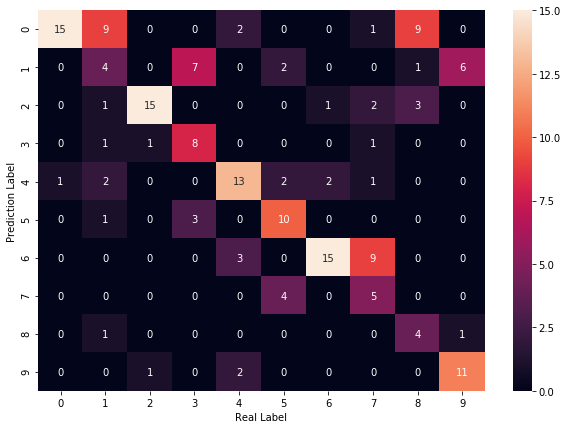

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([36., 20., 22., 11., 21., 14., 27.,  9.,  6., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:11 index:[1] real:5
#1 min_error:11 index:[3] real:2
#2 min_error:11 index:[0] real:8
#3 min_error:11 index:[0] real:0
#4 min_error:11 index:[0] real:1
#5 min_error:11 index:[6] real:7
#6 min_error:11 index:[6] real:6
#7 min_error:11 index:[3] real:3
#8 min_error:11 index:[2] real:2
#9 min_error:11 index:[1] real:1
#10 min_error:11 index:[6] real:7
#11 min_error:11 index:[9] real:4
#12 min_error:11 index:[2] real:6
#13 min_error:11 index:[3] real:3
#14 min_error:11 index:[1] real:1
#15 min_error:11 index:[1] real:3
#16 min_error:11 index:[1] real:9
#17 min_error:11 index:[0] real:1
#18 min_error:11 index:[0] real:7
#19 min_error:11 index:[4] real:6
#20 min_error:11 index:[0] real:8
#21 min_error:11 index:[4] real:4
#22 min_error:11 index:[3] real:3
#23 min_error:11 index:[3] real:1
#24 min_error:11 index:[4] real:4
#25 min_error:11 index:[0] real:0
#26 min_error:11 index:[1] real:5
#27 min_error:11 index:[3] real:3
#28 min_error:11 index:[6] real:6
#29 min_error:11 index:[

In [36]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(15 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [37]:
np.sum(list_P == digits.target[:1617])/1617

0.6004947433518862

In [38]:
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
np.mean(winner_fitness)

0.87569573283859